# questions to answer 
-Is there a correlation between a movie’s rating and its runtime.
-Which movie genre has the highest number of votes?
-Which genre has improved the most (in terms of number of votes) in 2015 (in comparison with the beginning of the century - 2000)?
-Which company is the most successful in terms of number of movies with rating above avg?
-What kinds of properties are associated with movies that have high revenues?


(NOTE: I'm not going to copy paste my intro to the project here, as you can easily find it in the pdf file attached) 


In [1]:
#libraries import
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline


In [2]:
#df out of csv
df=pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# DATA CLEANSING 

In [3]:
#dropping columns I won't need for analysis 
df.drop(['homepage','tagline','keywords','overview','imdb_id','popularity','cast','director'],axis=1,inplace=True)



In [4]:
df.head()

,id,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#inspecting datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                      10866 non-null int64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.1+ MB


In [6]:
#casting release_date to date  (evenrually it turned out that i didn't need to do that, but still it was a nice practise)
df.release_date=pd.to_datetime(df.release_date)

In [7]:
df.head()

,id,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#checking for duplicates
sum(df.duplicated())

#removing duplicates
df.drop_duplicates(inplace = True)

In [9]:
#double checking that all duplicated rows were removed
sum(df.duplicated())

0

# Question #1: correlation between popularity and runtime


## do movies with runtime>than median have lower raiting (movies with 500+ votes only)

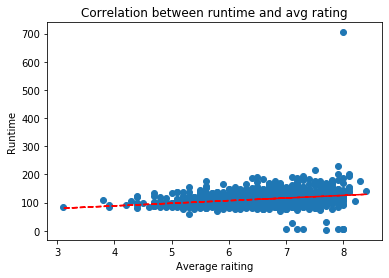

In [10]:
#including movies with only 217+ votes (as it is a mean for votes)

df_1q=df.query('vote_count>=217')

#checking correlation 


x = df_1q['vote_average']
y = df_1q['runtime']

plt.scatter(x, y)
plt.xlabel('Average raiting')
plt.ylabel('Runtime')
plt.title('Correlation between runtime and avg rating')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()



In [11]:
#calculating correlation coefficent 
r = np.corrcoef(x, y)
r

array([[1.        , 0.27671938],
       [0.27671938, 1.        ]])

# Question #2: What genre has the highest amount of votes

In [12]:
#splitting the genre column to get 1 genre per column. Assuming that the genres are written in order of importance, I'm only interested in the primary one
nums=2

col_names=[f"genre{i}" for i in range(nums)]

df[col_names]= df['genres'].str.split('|',nums-1, expand=True)



In [13]:
df.head()

,id,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre0,genre1
0,135397,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller
1,76341,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller
2,262500,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller
3,140607,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure|Science Fiction|Fantasy
4,168259,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime|Thriller


In [14]:
#grouping movies by primary genre

votes_by_genre=df.groupby(['genre0'])['vote_count'].sum()

In [15]:
#renaming columns 

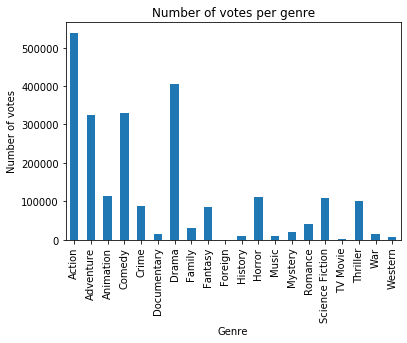

In [16]:
votes_by_genre.plot(kind="bar")
plt.xlabel('Genre')
plt.ylabel('Number of votes')
plt.title('Number of votes per genre')
plt.show()

# Question #3: Which genre has improved the most (in terms of number of votes) in 2015 (in comparison with the beginning of the century - 2000)?

In [17]:
#creating separate dfs for 2000 and 2015

df00=df.query('release_year==2000')

df15=df.query('release_year==2015')


In [18]:
#grouping dfs by primary genre and counting the number of votes
df00=df00.groupby(['genre0'])['vote_count'].sum()
df15=df15.groupby(['genre0'])['vote_count'].sum()

In [19]:
#making dfs out of groupby results
df00= df00.to_frame()
df15= df15.to_frame()

In [20]:
#adding 00 prefix to df00 vote_count column 
df00.rename(columns=lambda col:col[:10]+'_00',inplace=True)

In [21]:
#merging two dfs
df_combined=df00.merge(df15,how="inner",left_on="genre0",right_on="genre0")

In [22]:
df_combined

,vote_count_00,vote_count
genre0,,
Action,9387,50292
Adventure,7683,10276
Animation,2072,1885
Comedy,7983,22398
Crime,848,13839
Documentary,39,1976
Drama,7566,28881
Family,837,4057
Fantasy,830,3639


In [23]:
#creating column for difference between 2015 and 2000 column 
df_combined['vote_diff'] = df_combined['vote_count'] - df_combined['vote_count_00']


In [24]:
#finding the genre that improved the most
max_change = df_combined['vote_diff'].max()
df_combined[df_combined['vote_diff'] == max_change]

,vote_count_00,vote_count,vote_diff
genre0,,,
Action,9387,50292,40905


In [25]:
#create a column out of index to use it for plotting 
df_combined.reset_index(drop=False,inplace=True)

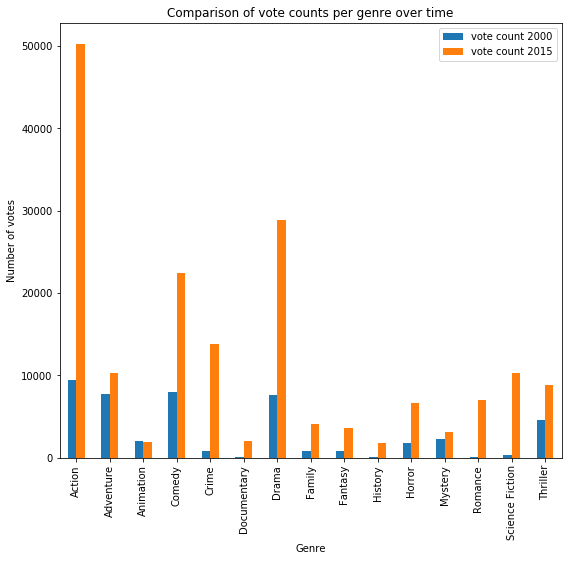

In [26]:
#plotting 
df_combined.plot(x="genre0", y=["vote_count_00", "vote_count"], kind="bar",figsize=(9,8))
plt.xlabel('Genre')
plt.ylabel('Number of votes')
plt.legend(['vote count 2000','vote count 2015'])
plt.title('Comparison of vote counts per genre over time')
plt.show()

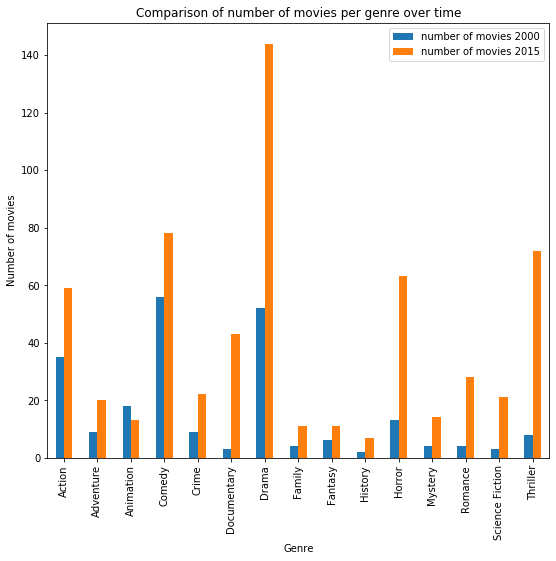

In [27]:
#calculating and ploting the number of movies per year per genre
df00_v2=df.query('release_year==2000')

df15_v2=df.query('release_year==2015')


df00_v2=df00_v2.groupby(['genre0'])['id'].nunique()
df15_v2=df15_v2.groupby(['genre0'])['id'].nunique()

df00_v2= df00_v2.to_frame()
df15_v2= df15_v2.to_frame()

df00_v2.rename(columns=lambda col:col[:10]+'_00',inplace=True)

df_combined_v2=df00_v2.merge(df15_v2,how="inner",left_on="genre0",right_on="genre0")

df_combined_v2['num_of_movies_diff'] = df_combined_v2['id'] - df_combined_v2['id_00']

df_combined_v2.reset_index(drop=False,inplace=True)

df_combined_v2.plot(x="genre0", y=["id_00", "id"], kind="bar",figsize=(9,8))
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.legend(['number of movies 2000','number of movies 2015'])
plt.title('Comparison of number of movies per genre over time')
plt.show()

# Question #4:  Which company is the most successful in terms of number of movies with rating above avg?

In [28]:
#splitting the company column to get 1 company per column. Assuming that the companies are written in order of importance, I'm only interested in the primary one
nums=2

col_names=[f"company{i}" for i in range(nums)]

df[col_names]= df['production_companies'].str.split('|',nums-1, expand=True)

df

,id,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre0,genre1,company0,company1
0,135397,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller,Universal Studios,Amblin Entertainment|Legendary Pictures|Fuji T...
1,76341,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller,Village Roadshow Pictures,Kennedy Miller Productions
2,262500,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller,Summit Entertainment,Mandeville Films|Red Wagon Entertainment|NeoReel
3,140607,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure|Science Fiction|Fantasy,Lucasfilm,Truenorth Productions|Bad Robot
4,168259,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime|Thriller,Universal Pictures,Original Film|Media Rights Capital|Dentsu|One ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0,0,The Endless Summer,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00,Documentary,None,Bruce Brown Films,None
10862,20379,0,0,Grand Prix,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00,Action,Adventure|Drama,Cherokee Productions,Joel Productions|Douglas & Lewis Productions
10863,39768,0,0,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery,Comedy,Mosfilm,None
10864,21449,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00,Action,Comedy,Benedict Pictures Corp.,None


In [29]:
#including movies with only 217+ votes (as it is a mean for votes)

df_4q=df.query('vote_count>=217')

In [30]:
#calculating average movie rating
r_avg=df_4q['vote_average'].mean()

In [31]:
#grouping by a company and counting number of movies with the rating above r_avg
df_bc=df.groupby(['company0'])['id'].nunique()

In [32]:
#making df out of groupby results
df_by_company= df_bc.to_frame()


In [33]:
#create a column out of index to use it for plotting 
df_by_company.reset_index(drop=False,inplace=True)


In [34]:
#renaming columns  to take a nice screenshot
df_by_company.rename(columns = {'company0': 'Company', 'id': 'Number of high rated movies'}, inplace = True)




In [35]:
#getting only 3 top companies in terms of number of high rated movies
df_by_company=df_by_company.nlargest(3, 'Number of high rated movies')


print(df_by_company.to_string(index=False))

            Company  Number of high rated movies
 Universal Pictures                          460
 Paramount Pictures                          426
  Columbia Pictures                          271


# Question #5: Which year has the biggest number of movies with high profit (revenue-budget)?

In [36]:
#droping rows with 0 renvenue

df.info()
#there are no nan rows in this column. so i can go on without droping any values 




<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
genre0                  10842 non-null object
genre1                  8514 non-null object
company0                9835 non-null object
company1                6395 non-null object
dtypes: datetime64[ns](1), float64(3), int64(6), object(7)
memory usage: 1.5+ MB


In [37]:
#creating profit column
df['profit']=df['revenue_adj']-df['budget_adj']

In [38]:
#checking avg profit to determine what can be considered success (it should be higher than avg)
round(df.profit.mean(),1)


33819107.7

In [39]:
#creating df with movies for which profit is higher than average 
df_success=df.query("profit>33813323.4")


In [40]:
#grouping by year and calculating number of movies and creating a df out of group by results
df_success=df_success.groupby('release_year')['id'].nunique()
df_success= df_success.to_frame()
df_success.reset_index(drop=False,inplace=True)

In [41]:
#renaming columns
df_success.rename(columns={"release_year": "Release year", "id": "Number of high profitable movies"},inplace=True)

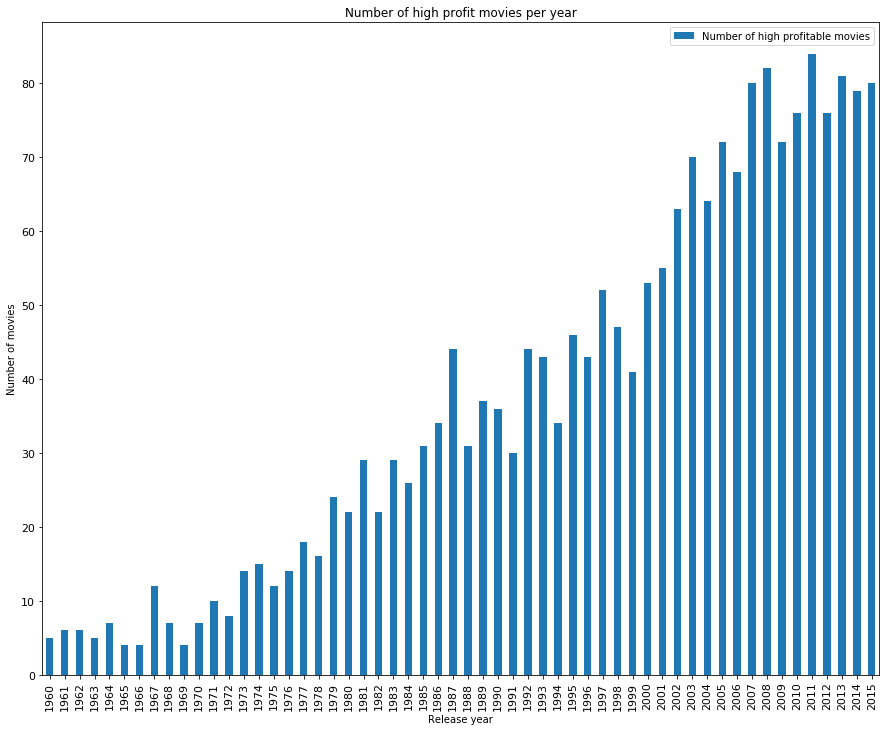

In [42]:
#plotting the bar chart 
df_success.plot(x='Release year',kind='bar',fontsize = 11,figsize=(15,12))
plt.ylabel('Number of movies')
plt.title('Number of high profit movies per year')
plt.show()